In [1]:
!git clone https://github.com/sheelfshah/banditpylib.git

Cloning into 'banditpylib'...
remote: Enumerating objects: 6973, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 6973 (delta 297), reused 270 (delta 223), pack-reused 6604
Receiving objects: 100% (6973/6973), 10.31 MiB | 29.08 MiB/s, done.
Resolving deltas: 100% (5217/5217), done.


In [2]:
%cd banditpylib

/content/banditpylib


In [3]:
!make install

pip install --upgrade pip
     |████████████████████████████████| 1.6MB 3.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip install -r requirements.txt
     |████████████████████████████████| 227 kB 4.1 MB/s 
     |████████████████████████████████| 105 kB 21.0 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 10.3 MB 19.1 MB/s 
     |████████████████████████████████| 21.5 MB 1.2 MB/s 
     |████████████████████████████████| 15.7 MB 111 kB/s 
     |████████████████████████████████| 9.9 MB 43.2 MB/s 
     |████████████████████████████████| 3.0 MB 43.9 MB/s 
     |████████████████████████████████| 1.0 MB 32.0 MB/s 
     |████████████████████████████████| 357 kB 50.2 MB/s 
     |████████████████████████████████| 280 kB 60.5 MB/s 
     |████████████████████████████████| 510 kB 39.6 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |█████████████████

In [4]:
!pip3 uninstall matplotlib
!pip3 install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 13.1 MB 91 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 

In [ ]:
# run only if updating
%cd banditpylib
!git pull
!pip install -e .

/content/banditpylib
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/sheelfshah/banditpylib
   ec20384..b909925  master     -> origin/master
Updating ec20384..b909925
Fast-forward
 .../protocols/collaborative_learning_player.py     |  6 +++-
 trial_outputs1.txt                                 | 41 ++++++++++++++++++++++
 2 files changed, 46 insertions(+), 1 deletion(-)
 create mode 100644 trial_outputs1.txt
Obtaining file:///content/banditpylib
  Attempting uninstall: banditpylib
    Found existing installation: banditpylib 1.0.0
    Can't uninstall 'banditpylib'. No files were found to uninstall.
  Running setup.py develop for banditpylib


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tempfile
import seaborn as sns
import random
sns.set(style="darkgrid")

from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import CollaborativeLearningProtocol, SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.collaborative_learner import CollaborativeAgent, CollaborativeMaster, CollaborativeLearner
from banditpylib.learners.mab_fcbai_learner import LilUCBHeuristic

In [24]:
means = [i/10 for i in range(1,10)]
random.shuffle(means)
print(means)

[0.6, 0.1, 0.5, 0.3, 0.4, 0.9, 0.2, 0.8, 0.7]


In [31]:
confidence = 0.99
rounds1, horizon1, num_agents1 = 10, 30000, 10
rounds2, horizon2, num_agents2 = 10, 30000, 3

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)

master1 = CollaborativeMaster(arm_num=len(arms), rounds=rounds1,
                              horizon=horizon1, num_agents=num_agents1, name="master 1")
master2 = CollaborativeMaster(arm_num=len(arms), rounds=rounds2,
                              horizon=horizon2, num_agents=num_agents2, name="master 2")

agent1 = CollaborativeAgent(arm_num=len(arms), rounds=rounds1,
                            horizon=horizon1, name="agent 1")
agent2 = CollaborativeAgent(arm_num=len(arms), rounds=rounds2,
                            horizon=horizon2, name="agent 2")

learners = [
            CollaborativeLearner(agent=agent1, master=master1,
                                 num_agents=num_agents1, name="learner 1"),
            CollaborativeLearner(agent=agent2, master=master2,
                                 num_agents=num_agents2, name="learner 2")
]
trials = 20

In [32]:
game1 = CollaborativeLearningProtocol(bandit=bandit, learners=learners)
game1.play(trials=trials, output_filename="trial_outputs1.txt")
data_df1 = trial_data_messages_to_dict("trial_outputs1.txt")
!rm trial_outputs1.txt

In [33]:
learners = [LilUCBHeuristic(len(arms), confidence)]
game2 = SinglePlayerProtocol(bandit=bandit, learners=learners)
game2.play(trials=trials, output_filename="trial_outputs2.txt")
data_df2 = trial_data_messages_to_dict("trial_outputs2.txt")
!rm trial_outputs2.txt

In [34]:
data_df = pd.concat([data_df1, data_df2])
data_df["confidence"] = confidence

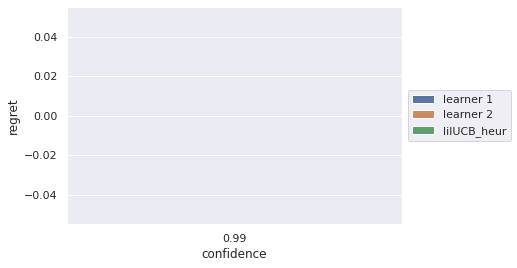

In [35]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='regret', hue='learner', data=data_df)
plt.ylabel('regret')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# non zero regret due to bug?

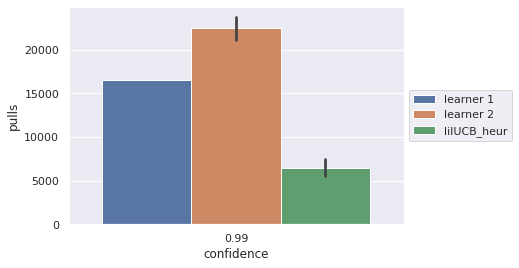

In [36]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()